In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Churn_Modelling.csv')


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
y = df.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X = df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


<Axes: ylabel='count'>

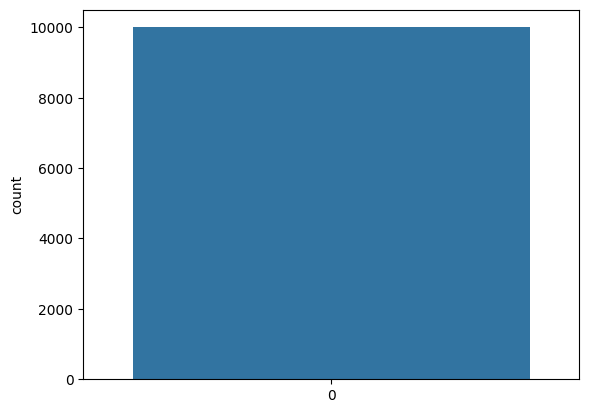

In [ ]:
sns.countplot(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
print(X['Gender'].head(7))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: Gender, dtype: int64


In [ ]:
X['Geography']=label.fit_transform(X['Geography'])
print(X['Geography'].head())
X['Geography'].value_counts()

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64


0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.compose import ColumnTransformer # Here is the one
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder="passthrough")
X = ct.fit_transform(X)
print(X)


[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ]])

In [ ]:
X_test

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.01240443,  0.        ]])

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6500, 16937) (6500,)
Test set: (3500, 16937) (3500,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators=100) #warning 10 to 100
classifier_4.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

model = SVC(kernel='linear', C=1)

# Fit the model to the training data
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# Predict the churn values for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8154285714285714
Confusion matrix:
 [[2794    9]
 [ 637   60]]


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the churn values for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8102857142857143
Confusion matrix:
 [[2798    5]
 [ 659   38]]


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = AdaBoostClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the churn values for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.858
Confusion matrix:
 [[2713   90]
 [ 407  290]]


In [ ]:
y_randomfor=classifier_4.predict(X_test)
prediction3=pd.DataFrame(y_randomfor)
prediction3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
import sklearn.metrics as metrics
percent3 = metrics.accuracy_score(y_test, prediction3)
percent3

0.8442857142857143

In [ ]:
from sklearn.tree import DecisionTreeClassifier
TeleTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
TeleTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:

y_predtree = TeleTree.predict(X_test)
prediction4=pd.DataFrame(y_predtree)
prediction4.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
percent4 = metrics.accuracy_score(y_test,prediction4)
percent4

0.8245714285714286